In [1]:
%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from helpers import plotcfg
from helpers import show_results
from helpers import preprocessing
from helpers import classic_algorithms
from helpers import learning_curve

In [2]:
X, y, d = pickle.load(gzip.open('../data/artificial.pickle', 'rb'), encoding='latin1')

## Model definition

In [3]:
model = make_pipeline(preprocessing.Cwt(),  # Wavelet transform         
                    StandardScaler(),  # Standardize features
                    preprocessing.ForestSelect(k=21, trees=100),  # Random Forest picks best features
                    linear_model.LogisticRegression())

Processing: ML model            . 18.606367111206055 s
Processing: Second difference   . 0.3552231788635254 s
Processing: Library correlation . 4.301881790161133 s




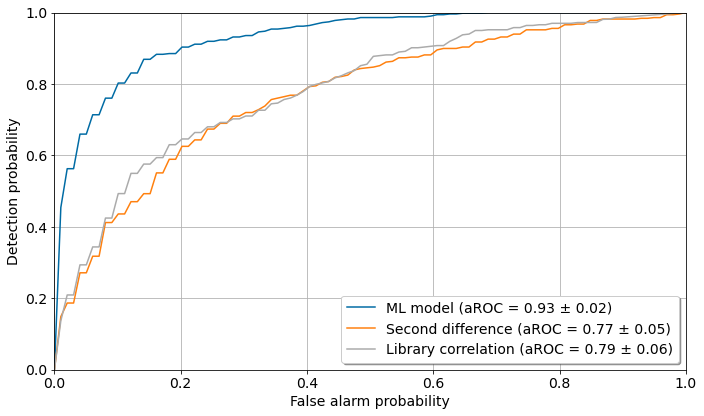

In [4]:
clf = [(u'ML model', model),
       (u'Second difference', classic_algorithms.SecondDifference(channel=50,
                                                                  fwhm=3,
                                                                  tol=1)),
       (u'Library correlation', classic_algorithms.LibCorNID(channel=50,
                                                             sensitivity=0.8,
                                                             fwhm=3,
                                                             tol=1))]

results = show_results.summary('Peak Classification',
                               clf,
                               X,
                               y,
                               cv=True,
                               n_iter=1,
                               train_sizes=np.linspace(0.05,1.00,50),
                               n_jobs=3,  # avoid hijacking all cpus
                               learnGraph=False,
                               rocGraph=True)

In [5]:
pd.DataFrame(results, columns=show_results.columns).set_index("Method")

,auROC,Accuracy,Detection rate,False alarm rate
Method,,,,
ML model,0.93 ± 0.02,0.85 ± 0.03,0.84 ± 0.06,0.14 ± 0.04
Second difference,0.77 ± 0.05,0.69 ± 0.05,0.54 ± 0.08,0.15 ± 0.05
Library correlation,0.79 ± 0.06,0.57 ± 0.04,0.17 ± 0.07,0.03 ± 0.02


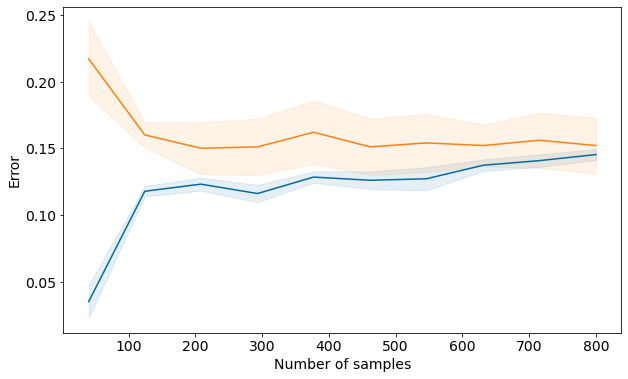

In [6]:
learning_curve.plot_learning_curve(model, X, y, cv=5)